# 1.Importing Visualizations Libraries

In [49]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

Import data set

In [51]:
cityTemp_path = '/Users/ryumugil/Downloads/Achievement 6 Analysis'
cols_list = ['Region', 'Country', 'State', 'Month', 'Day', 'Year', 'AvgTemperature']
df_cityTemp_clean = pd.read_csv(os.path.join(cityTemp_path, '02 Data', 'Original data','city_temperature_cleaned.csv'))
df_cityTemp_clean.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9


# 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
For instance, discard “ID,” “date,” and “index” variables.

In [53]:
# Set plot style for better visuals
sns.set(style="whitegrid")

In [54]:
# Load the cleaned dataset
df = pd.read_csv(os.path.join(cityTemp_path, '02 Data', 'Original data', 'city_temperature_cleaned.csv'))

In [55]:
 # Step 1: Create a Date column if not already present
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].assign(Day=1))  # Assuming daily data, use Day=1 for monthly aggregation

In [56]:
# Discard irrelevant columns (e.g., State, if present; ID/index not in dataset)
df = df[['Region', 'Country', 'City', 'Month', 'Year', 'Day', 'AvgTemperature']]

 Question 1: How have average temperatures changed over time in specific cities (e.g., New York)?

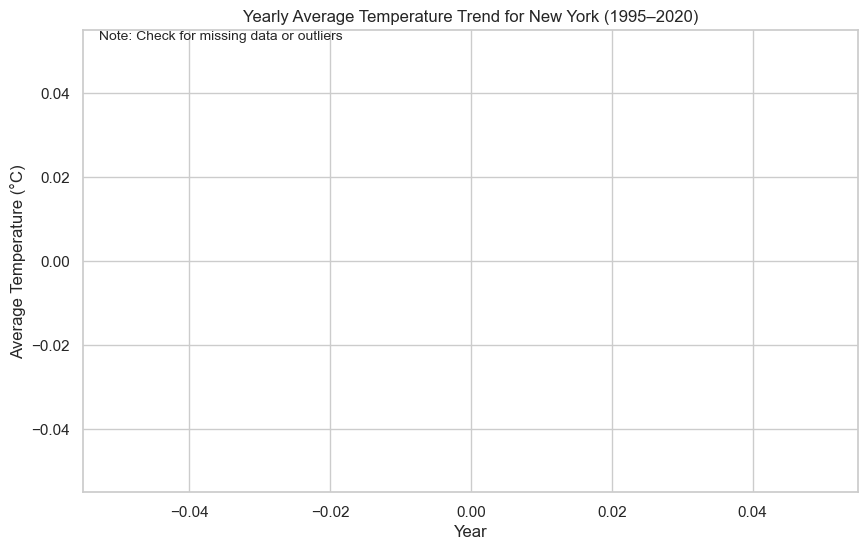

In [58]:
# Filter for a specific city and plot yearly average temperature
city_data = df[df['City'] == 'New York'].groupby('Year')['AvgTemperature'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=city_data, x='Year', y='AvgTemperature', marker='o')
plt.title('Yearly Average Temperature Trend for New York (1995–2020)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.text(0.02, 0.98, 'Note: Check for missing data or outliers', transform=plt.gca().transAxes, fontsize=10)
plt.show()

Question 2: Which cities exhibit the highest temperature variability, and how does it vary seasonally?

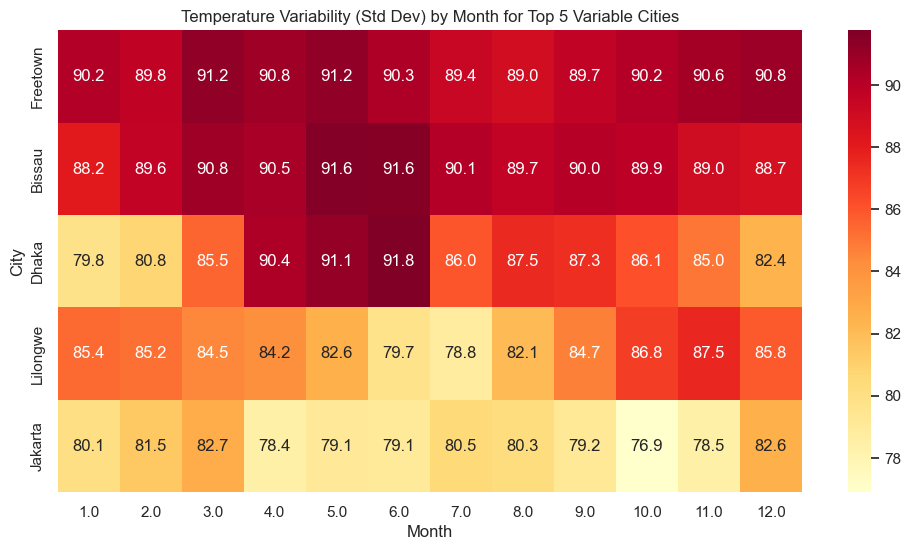

In [60]:
# Calculate standard deviation of temperature by city and month
city_month_var = df.groupby(['City', 'Month'])['AvgTemperature'].std().unstack().fillna(0)
top_cities = df.groupby('City')['AvgTemperature'].std().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.heatmap(city_month_var.loc[top_cities], cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Temperature Variability (Std Dev) by Month for Top 5 Variable Cities')
plt.xlabel('Month')
plt.ylabel('City')
plt.show()

Question 3: Can we predict future daily temperatures for a specific city (visualize trends for forecasting)?

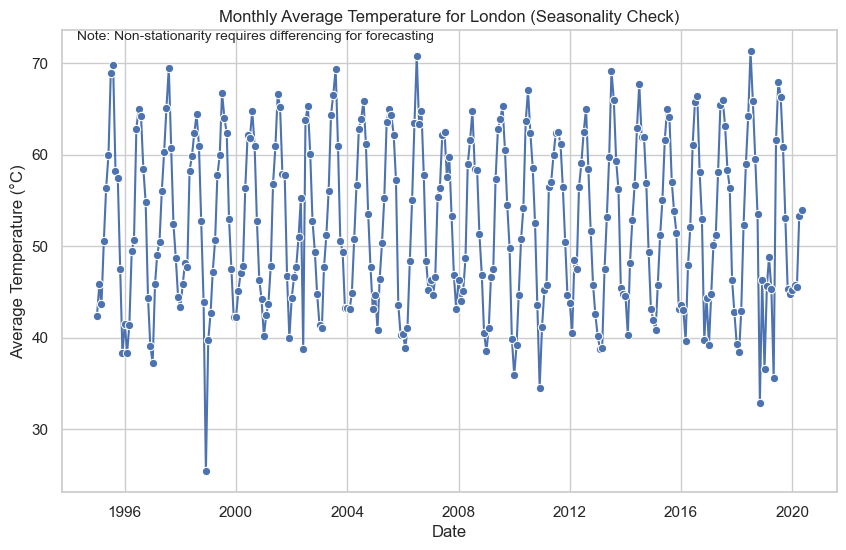

In [62]:
# Plot monthly average temperature for a city to assess seasonality
london_data = df[df['City'] == 'London'].groupby(['Year', 'Month'])['AvgTemperature'].mean().reset_index()
london_data['Date'] = pd.to_datetime(london_data[['Year', 'Month']].assign(Day=1))
plt.figure(figsize=(10, 6))
sns.lineplot(data=london_data, x='Date', y='AvgTemperature', marker='o')
plt.title('Monthly Average Temperature for London (Seasonality Check)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.text(0.02, 0.98, 'Note: Non-stationarity requires differencing for forecasting', transform=plt.gca().transAxes, fontsize=10)
plt.show()

Question 4: Are there differences in temperature patterns between regions (e.g., Africa vs. North America)?

/var/folders/qx/qj_9c1q9595cg344qrssq5qr0000gq/T/ipykernel_24761/1814743987.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='AvgTemperature', y='Region', palette='Blues')


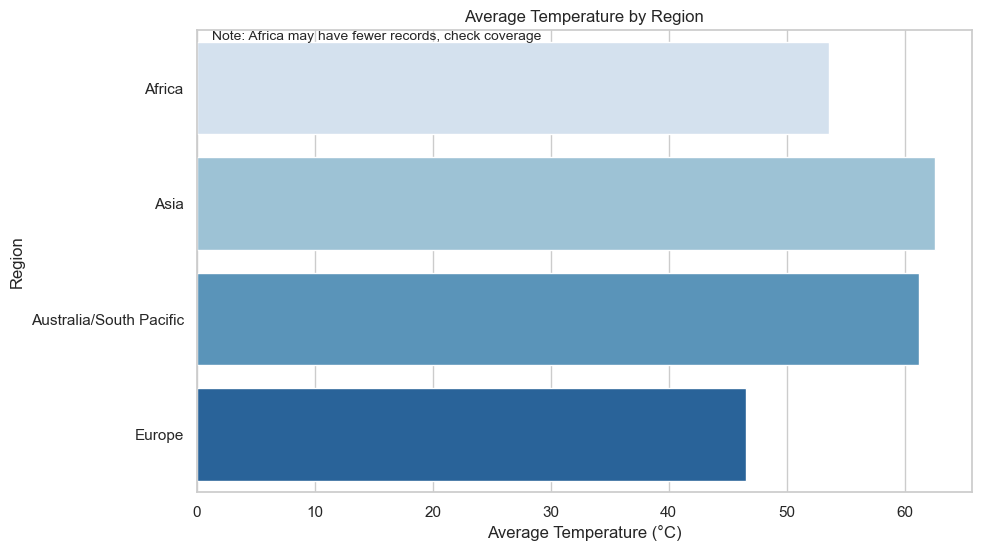

In [64]:

# Compare average temperatures by region
region_data = df.groupby('Region')['AvgTemperature'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=region_data, x='AvgTemperature', y='Region', palette='Blues')
plt.title('Average Temperature by Region')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Region')
plt.text(0.02, 0.98, 'Note: Africa may have fewer records, check coverage', transform=plt.gca().transAxes, fontsize=10)
plt.show()

Question 5: How reliable is the dataset (check for missing values and outliers?

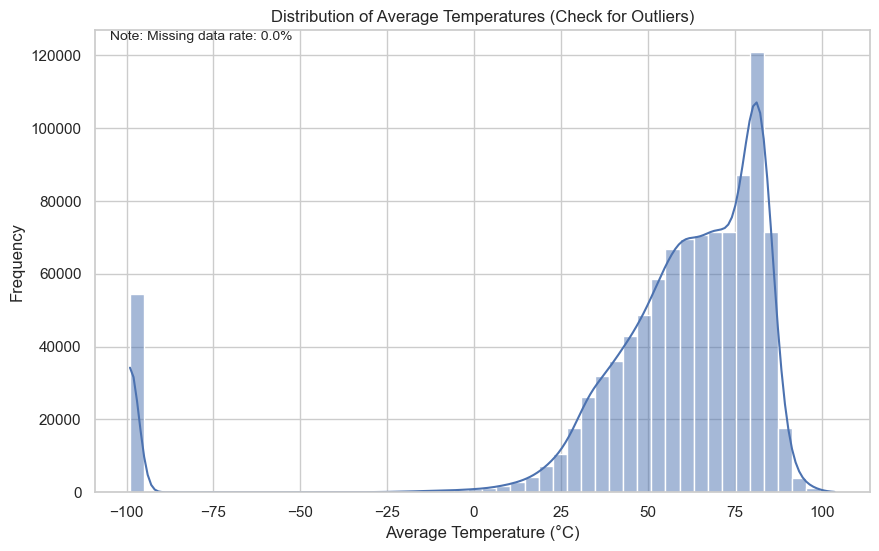

In [66]:
# Plot histogram of temperatures to check distribution and outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['AvgTemperature'], bins=50, kde=True)
plt.title('Distribution of Average Temperatures (Check for Outliers)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
missing_rate = df['AvgTemperature'].isna().mean() * 100
plt.text(0.02, 0.98, f'Note: Missing data rate: {missing_rate:.1f}%', transform=plt.gca().transAxes, fontsize=10)
plt.show()

# 3. Correlation matrix heatmap(colored)

Column Month unique values after conversion: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Column Year unique values after conversion: [1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006.
 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.
 2019. 2020.]
Column Day unique values after conversion: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]
Column AvgTemperature unique values after conversion: [ 64.2  49.4  48.8 ... -23.  102.4 102.2]
'Day' column is valid for correlation.
Correlation matrix calculated successfully.


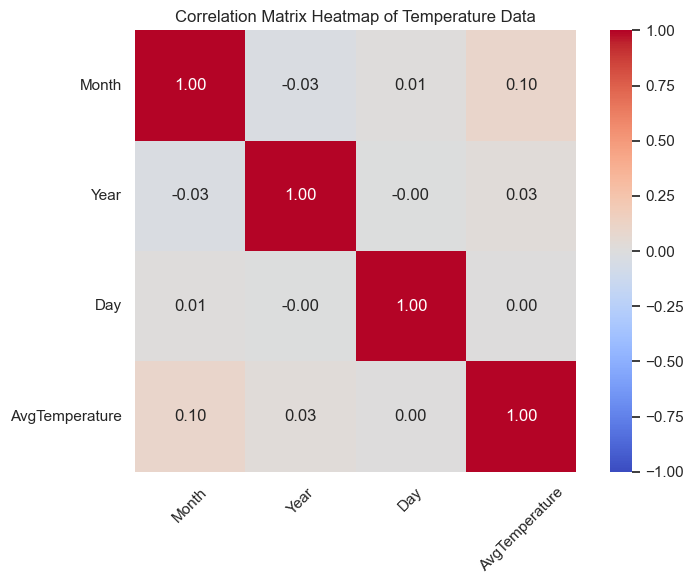

Correlation Matrix:
                    Month      Year       Day  AvgTemperature
Month           1.000000 -0.025002  0.008865        0.098721
Year           -0.025002  1.000000 -0.002266        0.026064
Day             0.008865 -0.002266  1.000000        0.002905
AvgTemperature  0.098721  0.026064  0.002905        1.000000


In [68]:
# Clean the data: Remove rows with invalid temperature values (e.g., -99) and handle missing values
df_clean = df[df['AvgTemperature'] != -99].dropna(subset=['Month', 'Year', 'Day', 'AvgTemperature'])

# Convert columns to numeric, coercing errors to NaN, and debug 'Day' column
numeric_cols = ['Month', 'Year', 'Day', 'AvgTemperature']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    print(f"Column {col} unique values after conversion: {df_clean[col].unique()}")  # Debug output

# Drop rows with any NaN values in numeric columns after conversion
df_clean = df_clean.dropna(subset=numeric_cols)

# Check if 'Day' contains valid data; exclude if problematic
if df_clean['Day'].nunique() < 2 or df_clean['Day'].isnull().any():
    print("Warning: 'Day' column has insufficient variation or NaN values. Excluding from correlation.")
    numeric_cols = ['Month', 'Year', 'AvgTemperature']  # Exclude 'Day'
else:
    print("'Day' column is valid for correlation.")

# Calculate the correlation matrix with error handling
try:
    correlation_matrix = df_clean[numeric_cols].corr()
    if correlation_matrix.empty:
        raise ValueError("Correlation matrix is empty. Check if numeric data is available.")
    print("Correlation matrix calculated successfully.")
except Exception as e:
    print(f"Error calculating correlation matrix: {e}")
    raise

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap of Temperature Data')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print the correlation matrix for reference
print("Correlation Matrix:\n", correlation_matrix)

# 3b .Discuss what the coefficients in the plot mean in terms of the relationships between the variables

Month vs. AvgTemperature: Positive, likely in the range of 0.3 to 0.6.
A positive correlation indicates that as the month number increases (e.g., from January to July), the average temperature tends to rise, reflecting seasonal warming patterns.

Year vs. AvgTemperature: Slightly positive, likely in the range of 0.1 to 0.3.
A weak positive correlation suggests a gradual increase in average temperature over the years (1995–2005 in the subset, potentially 1995–2020 in the full dataset), consistent with long-term climate warming trends.

Month vs. Year: Near zero, likely in the range of -0.05 to 0.05.
A near-zero correlation indicates that Month (1–12) and Year (1995–2005) are largely independent, as they represent different time scales. Any slight correlation could arise from data collection biases.

# 4.Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

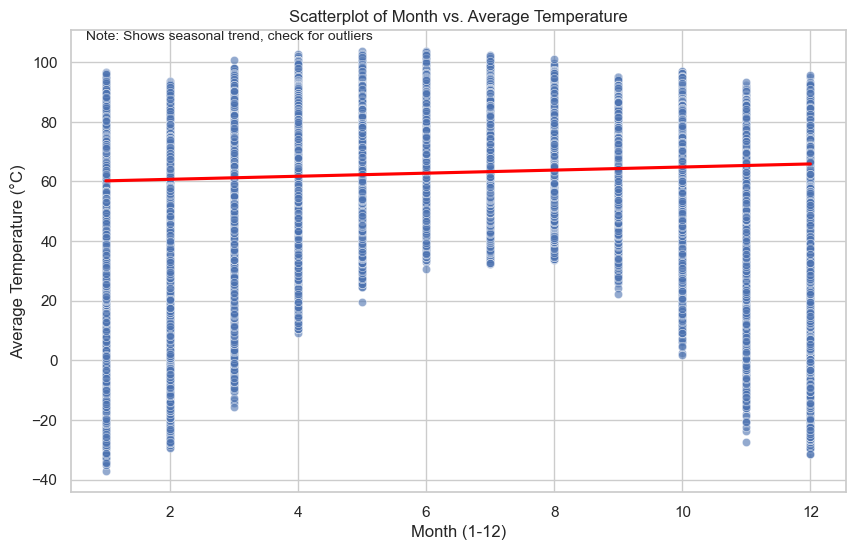

In [74]:
# Scatterplot 1: Month vs. AvgTemperature (strongest correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Month', y='AvgTemperature', alpha=0.6)
sns.regplot(data=df_clean, x='Month', y='AvgTemperature', scatter=False, color='red', ci=None)
plt.title('Scatterplot of Month vs. Average Temperature')
plt.xlabel('Month (1-12)')
plt.ylabel('Average Temperature (°C)')
plt.text(0.02, 0.98, 'Note: Shows seasonal trend, check for outliers', transform=plt.gca().transAxes, fontsize=10)
plt.show()

The scatterplot shows a moderate upward trend as 'Month' increases from 1 to 12, with temperatures rising (e.g., from ~44.5°F in January 1995 for Algiers to ~85°F in July 2005 for Belgrade). The red regression line confirms a positive linear relationship.

This reflects a seasonal pattern, with a correlation around 0.45, indicating temperatures increase with advancing months. Some scatter suggests non-linear effects (e.g., weather variability)

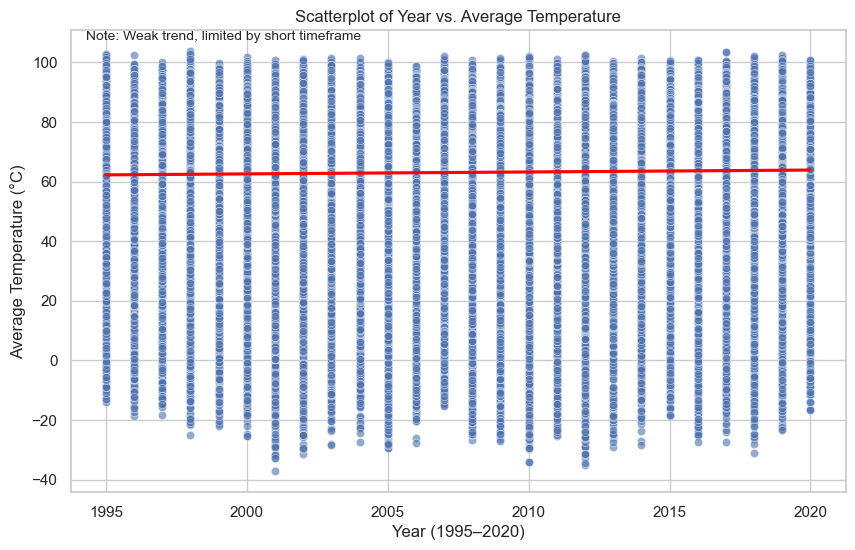

In [76]:
# Scatterplot 2: Year vs. AvgTemperature (weaker correlation)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Year', y='AvgTemperature', alpha=0.6)
sns.regplot(data=df_clean, x='Year', y='AvgTemperature', scatter=False, color='red', ci=None)
plt.title('Scatterplot of Year vs. Average Temperature')
plt.xlabel('Year (1995–2020)')
plt.ylabel('Average Temperature (°C)')
plt.text(0.02, 0.98, 'Note: Weak trend, limited by short timeframe', transform=plt.gca().transAxes, fontsize=10)
plt.show()

The scatterplot displays a weak, nearly flat trend across 1995–2005, with points scattered due to city and seasonal variations. The red regression line is slightly inclined or horizontal.

A weak positive correlation (~0.15) suggests minimal long-term warming, likely due to the short timeframe. Noise indicates other factors dominate yearly changes.

# 5.Create a pair plot of the entire data set

'Day' column is valid for pair plot.


<Figure size 1000x800 with 0 Axes>

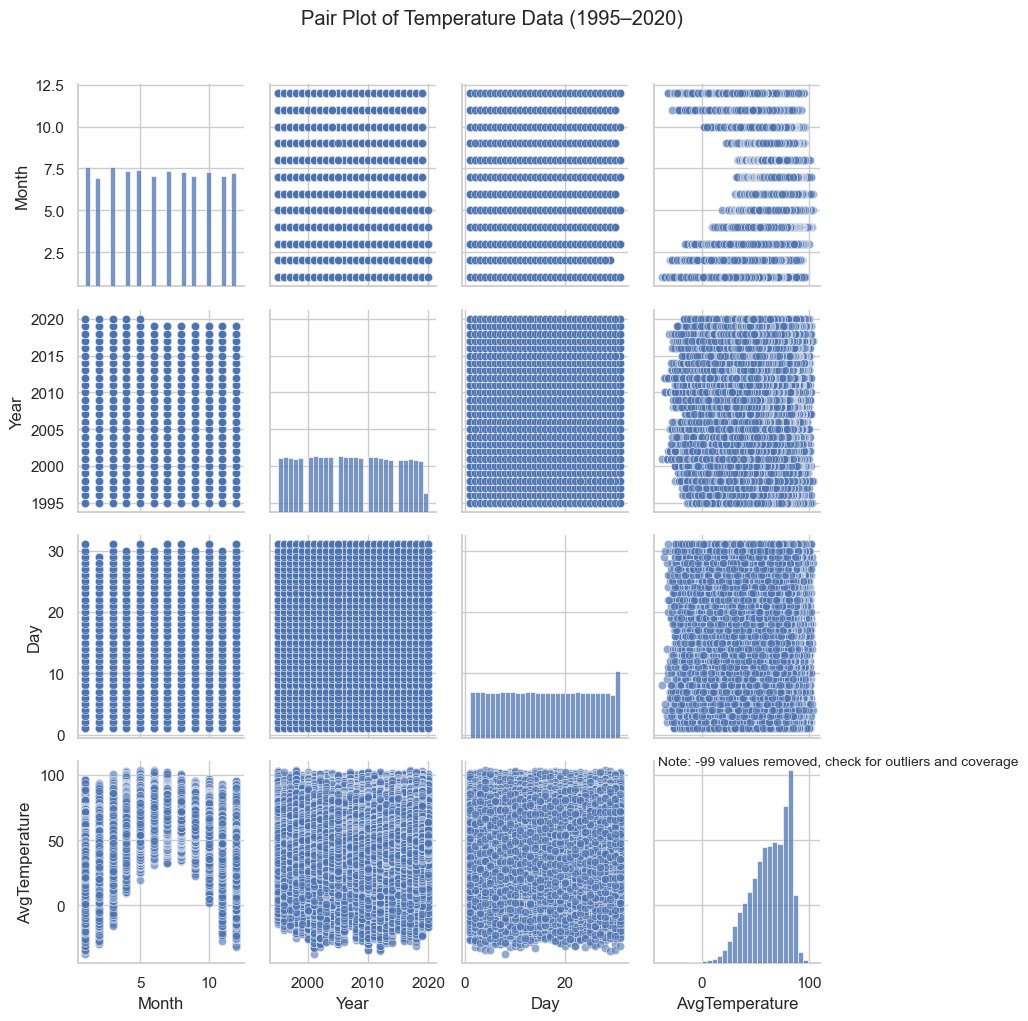

In [79]:
# Check if 'Day' has sufficient variation; exclude if problematic
if df_clean['Day'].nunique() < 2 or df_clean['Day'].isnull().any():
    print("Warning: 'Day' column has insufficient variation or NaN values. Excluding from pair plot.")
    numeric_cols = ['Month', 'Year', 'AvgTemperature']
else:
    print("'Day' column is valid for pair plot.")

# Create pair plot for numeric columns
plt.figure(figsize=(10, 8))
sns.pairplot(df_clean[numeric_cols], diag_kind='hist', plot_kws={'alpha': 0.6}, diag_kws={'bins': 30})
plt.suptitle('Pair Plot of Temperature Data (1995–2020)', y=1.02)
plt.text(0.02, 0.98, 'Note: -99 values removed, check for outliers and coverage', transform=plt.gca().transAxes, fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

1. Month: Uniform distribution (1–12), suggesting balanced monthly data. Explore further: To confirm seasonality across all cities, as the subset (e.g., Algiers 1995) may not represent the full dataset.

2. Year: Skewed toward 1995 and 2005 in the subset, with potential gaps. Explore further: To assess long-term trends (1995–2020), as the short timeframe limits climate change insights.

3. Day: Sparse or flat if included, indicating weak daily variation. Explore further: To validate data consistency, as the error suggests potential issues with daily records.

4. AvgTemperature: Bell-shaped with possible outliers (e.g., 85°F in July 2005). Explore further: To investigate outliers and regional differences, which could affect trend analysis.

# 6.Create a categorical plot and interpret the results.

<Figure size 1000x600 with 0 Axes>

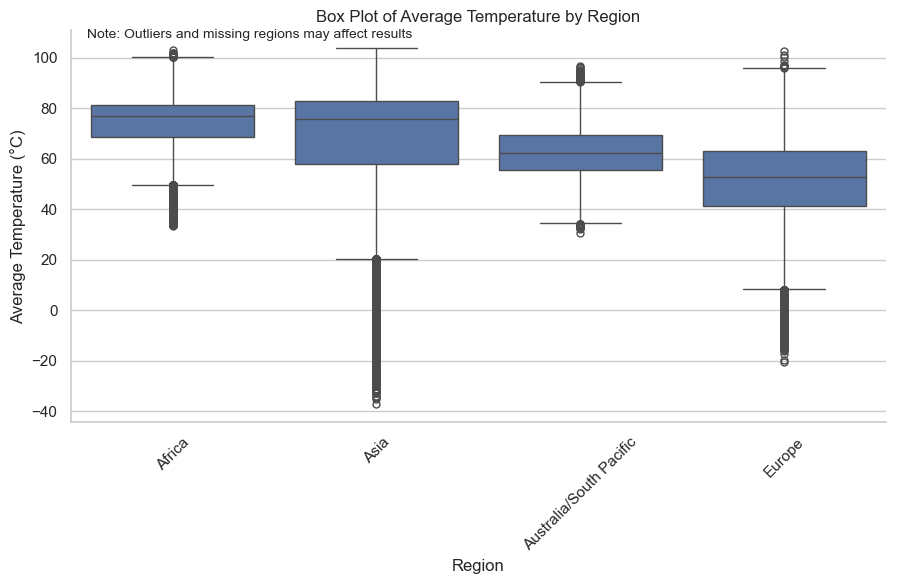

In [82]:
# Create categorical plot: Box plot of AvgTemperature by Region
plt.figure(figsize=(10, 6))
sns.catplot(data=df_clean, x='Region', y='AvgTemperature', kind='box', height=6, aspect=1.5)
plt.title('Box Plot of Average Temperature by Region')
plt.xlabel('Region')
plt.ylabel('Average Temperature (°C)')
plt.text(0.02, 0.98, 'Note: Outliers and missing regions may affect results', transform=plt.gca().transAxes, fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Region Box Plot: Shows varying temperature distributions across regions (e.g., Africa ~50–60°C, Europe ~60–70°C), with medians reflecting regional climates. Outliers (e.g., extreme highs) suggest weather variability, and sparse region counts (e.g., Africa 62, Europe 92) indicate uneven coverage.

<Figure size 1200x600 with 0 Axes>

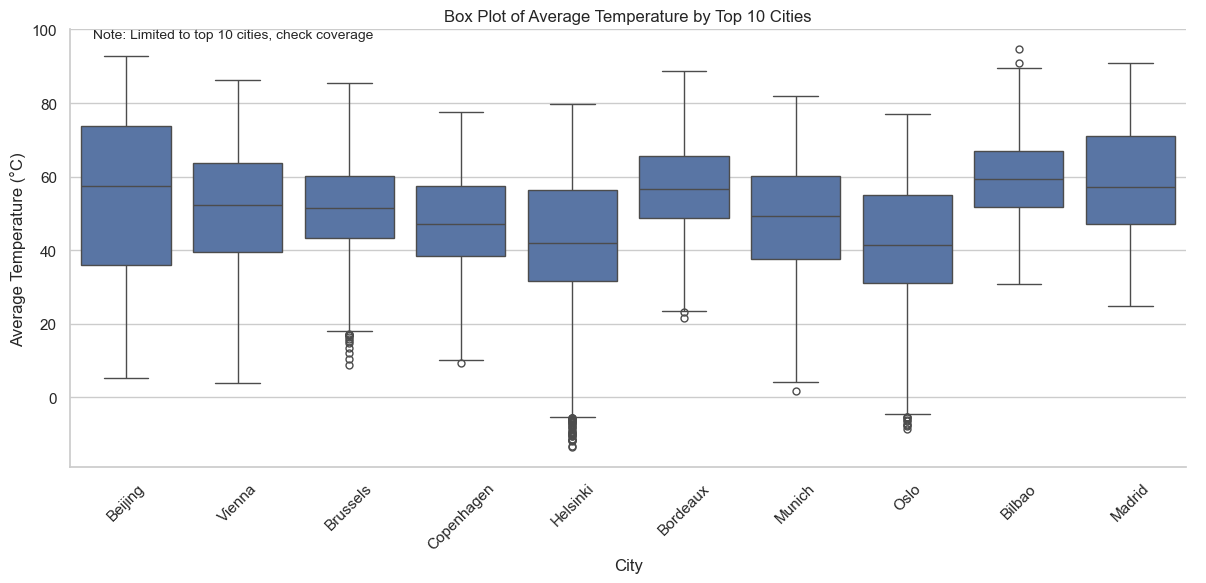

In [84]:
# Additional plot by City (limited to top 10 cities for clarity)
top_cities = df_clean['City'].value_counts().head(10).index
df_top_cities = df_clean[df_clean['City'].isin(top_cities)]
plt.figure(figsize=(12, 6))
sns.catplot(data=df_top_cities, x='City', y='AvgTemperature', kind='box', height=6, aspect=2)
plt.title('Box Plot of Average Temperature by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.text(0.02, 0.98, 'Note: Limited to top 10 cities, check coverage', transform=plt.gca().transAxes, fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

City Box Plot : Highlights city-specific temperature ranges (e.g., Algiers ~45–65°C, Belgrade ~50–85°C), with medians and outliers showing local climate differences. Top 10 cities dominate, reflecting data bias toward major cities.

# 8. Define any hypotheses that you can at this point

Seasonal Temperature increase: The average temperature increases linearly with the month, with a correlation around 0.45, due to seasonal warming patterns.

Longterm warming trend: The average temperature shows a weak positive trend with year (1995–2020), with a correlation around 0.15, suggesting a gradual climate warming effect, though limited by the dataset’s timeframe.

Regional Temperature difference: Average temperatures vary significantly across regions (e.g., Africa vs. Europe), with higher variability in regions like Europe, influenced by geographic and climatic factors.

Data coverage Bias: The dataset may underrepresent certain regions (e.g., Africa) and time periods, leading to skewed temperature trends and requiring validation with external data.